**ÍNDICE**
1. TRATAMIENTO DE LOS EJEMPLOS DE ENTRENAMIENTO
    1. Extracción de los datos ofrecidos
    2. Selección de técnicas de Aprendizaje automático
2. TRATAMIENTO DE LOS EJEMPLOS DE VALIDACIÓN
3. PRUEBAS Y MEJORA DE LAS TÉCNICAS ANTERIORES
3. ANÁLISIS DE HIPÓTESIS INICIALES
    3.1 Parámetros y datos obtenidos
    3.2 Clasificación óptima
4. CONCLUSIONES

 # TRATAMIENTO DE LOS EJEMPLOS DE ENTRENAMIENTO

## EXTRACCIÓN DE LOS DATOS OFRECIDOS

**ARCENE** es un proyecto científico dedicado a la detección del cancer de ovarios y prósrata y clasificación de potenciales pacientes según datos de espectrometría de masa de los mismos.
El *Data Set* ARCENE,con el que vamos a trabajar en este proyecto, es uno de los cinco *Data Set* del "desafío de detección de Características NIPS. 2003"
El *Data Set* se divide en tres a su vez:
- *Training Set*: conjunto de ejemplos de entrenamiento para diseñar nuestro clasificador de conjuntos de personas con cáncer y sin cáncer
- *Validation Set*: conjunto de ejemplos de validación que nos permite calcular el porcentaje de acierto de nuestro clasificador y evaluar las hipótesis y decisiones iniciales tomadas relativas a las técnicas de entrenamiento, parámetros usados para funciones y cualquier decisión que influya en la precisión de nuestro sistema de aprendizaje automático.
- *Test Set*: Se ofrece como un conjunto de datos de entrada reales para los que nuestro clasificador tendría que predecir en qué conjunto se encasilla.

Solo disponemos de las salidas esperadas, o variables*y*, del Training Set y Validation Set. Es por ello, que estos son los arhivos de los que nos valdremos para diseñar el sistema de aprendizaje automático.

**ESTRUCTURA**

De los 900 registros de pacientes o ejemplos de los que disoponemos, 100 son destinados a ser ejemplos de entrenamiento para nuestro clasificador, otros 100 corresponden con los ejemplos de validación y los 700 restantes son ejemplos para el test final.


Cada uno de los registros de personas están formados por 10.000 características o atributos, de las cuales 3000 se añadieron de forma adicional y no tienen valor para la predcción de nuestro sistema.

Las variables de entrada de los  ejemplos de entrenamiento se encuentran almacenadas en el archivo ***"arcene_train.data"*** y las etiquetas de salida esperada para cada uno de ellos las obtenemos de ***"arcene_train.labels".***

Enlace a la descripción de las matrices con los datos de entrada [arcene.param](https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene.param)

 ### Paso 1- lectura de los data-set ofrecidos.

In [15]:
#Para la visualización de gráficos
import matplotlib.pyplot as plt

#Procesamiento de datos
import numpy as np
from pandas.io.parsers import read_csv
import scipy.optimize as opt
from sklearn.preprocessing import PolynomialFeatures as pf
from scipy.io import loadmat
from sklearn import decomposition

#Documentación del Código
#para la traducción del código latex
#from IPython.display import display, Math
#import pdb; pdb.set_trace()

In [16]:
def loadMatrix(file):
    return np.loadtxt(file)

In [19]:
def lectura_Train_Set():
    X = loadMatrix('arcene_train.data')
    y = loadMatrix('arcene_train.labels')
    return (X,y)

In [22]:
lectura_Train_Set()
# A continuación se aprecia el tamaño de la matriz de datos de entrada y los valores de esta junto con los 
#labels correspondientes

(array([[  0.,  71.,   0., ...,   0.,   0., 524.],
        [  0.,  41.,  82., ...,   0., 284., 423.],
        [  0.,   0.,   1., ...,   0.,  34., 508.],
        ...,
        [  2.,  15.,  48., ...,   0.,   0., 453.],
        [  8.,   0.,  38., ...,   0., 189., 403.],
        [  0.,   0.,   0., ...,   0.,  10., 365.]]),
 array([ 1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,
         1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,
         1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,
        -1.,  1., -1., -1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
        -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        -1., -1., -1.,  1.,  1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,
        -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,
        -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.]))

### Paso 2 - Selección de la técnica de aprendizaje automático

En la asignatura de Machine Learning hemos visto las siguientes técnicas aplicables al entrenamiento para la clasificación de unos datos de entrada en dos o varios grupos o clusters:

 

**1 Regresión lineal con varias variables**

**2 Regresión logística**

    1 Redes Neuronales

    2 Support Vector Machines(SVM)

    3 Clustering(k-means algorithms) 

Para decidir qué técnica usar nos puede ayudar representar los datos de entrada para observar gráficamente su distribución

In [5]:
def grafic_train_examples_representation(X, y):
    pos = np.where(y == 1)
    pos0 = np.where(y == 0)
    plt.scatter(X[pos,0], X[pos,1], marker='+', c='k')
    plt.scatter(X[pos0,0], X[pos0,1], marker='o', c='g')
    plt.show()

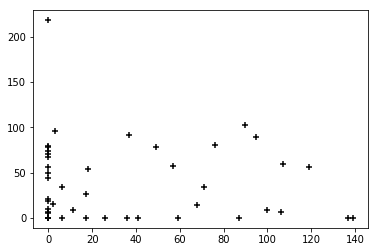

In [6]:
X, y = lectura_Train_Set()
grafic_train_examples_representation(X, y)

Como se puede observar a simple vista, los datos no se distribuyen de forma lineal, descartando así la regresión lineal para su clasificación.
Regresión logística nos será útil y la aplicaremos como técnica para entrenar una red neuronal y para calcular los support vector Machines de nuestro problema . Esto nos permitirá comparar ambas técnicas y analizar el porcentaje de acierto respecto a los ejemplos de entrenamiento de un mecanismo y de otro.

Por otro lado clustering se aplica cuando disponemos de los datos de entrada ***X*** pero no de los datos de salida ***y*** para el entrenamiento.Este no es el caso de nuestro proyecto, de modo que tampoco necesitamos aplicar una técnica de entrenamiento no supervisado como la anterior.

#### Redes Neuronales

Para aprender los valores de θ óptimos , primero les damos unos valores aleatorios de partida en la función ***"pesos aleatorios"*** y si aplicamos la función optimize de sklearn dentro de la función ***"parametros"***. En la función ***"bestRegresion"** iteramos sobre la invocación de la función ***"parametros"***, minimizando el error J(θ).

Los θ que den lugar a ese valor óptimo del coste, serán los usados para predecir los ejemplos seleccionados para el test.

In [7]:
def pesosAleatorios(L_in, L_out):
    epsilon = 6**(0.5) / (L_in + L_out)
    return np.random.rand(L_in, L_out + 1) * 2 * epsilon - epsilon

In [8]:
def parametros(params, input_size, hidden_size, num_labels, X, y, reg):
    result = opt.minimize(fun=backprop, x0=params,
                         args=(input_size, hidden_size,
                         num_labels, X, y, reg),
                         method='TNC', jac=True,
                         options={'maxiter':70})
    return result.x

Funciones auxiliares para el backprop de la red neuronal

In [23]:
def saveMatrix(file, X):
    return np.savetxt(file, X)

In [24]:
def sigmoide(z):
    return 1 / (1 + np.exp(-1*z))

In [11]:
def derivadaSigmoide(z):
    return sigmoide(z)*(1-sigmoide(z))

##### Retropropagación para calcular el coste y gradiente en una red neuronal 

In [25]:
def backprop(params_rn, num_entradas, num_ocultas , num_etiquetas , X, y, reg):
    
    theta1 = np.reshape(params_rn[:num_ocultas*(num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params_rn[num_ocultas*(num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))
    m = len(X)
   #Input
    ones_columns_input = np.array(np.ones(m))
    a1 = np.insert(X, 0,ones_columns_input, axis = 1)
    
    #hidden_layer
    z2 = np.dot(theta1, a1.transpose())
    a2 = sigmoide(z2)
    one_columns_hidden = np.array(np.ones(m))
    a2 = np.insert(a2, 0, one_columns_hidden, axis = 0)
                                  
    #Output_layer
    z3 = np.dot(theta2, a2)
    h = sigmoide(z3)
    y_converted = (np.ravel(y) + 1)/2
    
     #Cost
    regulation = (reg/(2*m)) * (np.sum(theta1**2) + np.sum(theta2**2))
    J = np.sum(-y_converted * np.log(h) - (1 - y_converted)*np.log(1 - h)) * (1/m)
    J_regulated = J + regulation
    
    # Retro-Propagation
    d3 = h - y_converted
    z2 = np.insert(z2, 0, np.ones(m), axis = 0)
    z2prima = derivadaSigmoide(z2)
    d2 = (np.dot(theta2.transpose(), d3))*z2prima
    
    #Gradient
    delta2 = np.dot(d3,a2.transpose())
    delta1 = np.dot(d2, a1)
                                  
    #Regularization
    
    D1 = (delta1[1:,:]/m + theta1*reg/m).ravel()
    D2 = (delta2/m + theta2*reg/m).ravel()
    gradient = np.r_[D1, D2]
    
    return J_regulated, gradient

In [26]:
def coste(params, X, num_entradas, num_ocultas, num_etiquetas):
    theta1 = np.reshape(params[:num_ocultas*(num_entradas + 1)], (num_ocultas, (num_entradas + 1)))
    theta2 = np.reshape(params[num_ocultas*(num_entradas + 1):], (num_etiquetas, (num_ocultas + 1)))
    m = len(X)
    #Input
    ones_columns_input = np.array(np.ones(m))
    a1 = np.insert(X, 0,ones_columns_input, axis = 1)
    #hidden_layer
    z2 = np.dot(theta1, a1.transpose())
    a2 = sigmoide(z2)
    one_columns_hidden = np.array(np.ones(m))
    a2 = np.insert(a2, 0, one_columns_hidden, axis = 0)
    #Output_layer
    z3 = np.dot(theta2, a2)
    return sigmoide(z3)

In [27]:
def evaluacion(params, X, Y, num_entradas, num_ocultas, num_etiquetas):
    h = coste(params,X,num_entradas,num_ocultas,num_etiquetas)
    z = (np.ravel(h) >= 0.5)
    Y = (np.ravel(Y) + 1)/2
    z = map((lambda x,y: x == y), z, Y)
    print (Y)
    print (z)
    return np.ravel(sum(z)/float(len(z))*100)[0]

In [28]:
def bestRegresion(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, X, y, bound_left, bound_right, iterations):
    regs = np.linspace(bound_left, bound_right, num=iterations)
    params = np.concatenate((np.ravel(theta1), np.ravel(theta2)))
    sol = []
    for i in regs:
        gradiente = parametros(params, num_entradas, num_ocultas, num_etiquetas, X, y, i)
        e = evaluacion(gradiente, X, y, num_entradas, num_ocultas, num_etiquetas)
        sol += [(i, e)]
    return sol

# Tratamiento de los ejemplos de Validación

In [29]:
def crossValidation(params, num_entradas, num_ocultas, num_etiquetas):
    X = loadMatrix('arcene_valid.data')
    pca = decomposition.PCA(n_components=100)
    pca.fit(X)
    #X = pca.transform(X)
    h = coste(params, X, num_entradas, num_ocultas, num_etiquetas)
    z = (np.ravel(h) >= 0.5)
    return np.ravel(sum(z)/float(len(z))*100)[0]

In [31]:
def test():
    reg = 10
    X, y = lectura_Train_Set()
    #X = loadMatrix('arcene_train.data')
    
    pca = decomposition.PCA(n_components=100)
    pca.fit(X)
    #X = pca.transform(X)
    
    #y = loadMatrix('arcene_train.labels')
    y = y.astype(int)
    num_entradas = X.shape[1]
    num_ocultas = 350
    num_etiquetas = 1

    theta1 = pesosAleatorios(num_ocultas, X.shape[1])
    theta2 = pesosAleatorios(num_etiquetas, num_ocultas)
    #saveMatrix('theta1.out', theta1)
    #saveMatrix('theta2.out', theta2)

    #theta1 = loadMatrix('theta1.out')
    #theta2 = loadMatrix('theta2.out')
    cvX = loadMatrix('arcene_valid.data')
    cvY = loadMatrix('arcene_valid.labels').astype(int)
    pca.fit(cvX)
    #cvX = pca.transform(cvX)
    #print bestRegresion(theta1, theta2, num_entradas, num_ocultas, num_etiquetas, X, y, 20, 40.0, 3)
    
    #coste, gradiente = backprop(np.concatenate((np.ravel(theta1), np.ravel(theta2))), num_entradas, num_ocultas, num_etiquetas, X, y, reg)

    pesos = np.concatenate((np.ravel(theta1), np.ravel(theta2)))
    for i in range(1, int(len(X)/2)):
        print (i)
        pesos = parametros(pesos, num_entradas, num_ocultas, num_etiquetas, X[0:i*2], y[0:i*2], reg)
        Jt = backprop(pesos, num_entradas, num_ocultas, num_etiquetas, X[0:i*2], y[0:i*2], reg)[0]
        Jcv = backprop(pesos, num_entradas, num_ocultas, num_etiquetas, cvX[0:i*2], cvY[0:i*2], reg)[0]
        print (Jt, Jcv, Jt - Jcv)
        
    #print (evaluacion(pesos, X, y, num_entradas, num_ocultas, num_etiquetas))
    #print (evaluacion(pesos, cvX, cvY, num_entradas, num_ocultas, num_etiquetas))
    #saveMatrix('weights.out', pesos)

In [ ]:
test()

1
0.5780029110901537 1.143253554369093 -0.5652506432789393
2
0.36805777818939056 1.295006148892784 -0.9269483707033934
3
0.4153203061410908 0.7247571649978395 -0.3094368588567487
4
0.4920594713237434 0.7355728442892038 -0.24351337296546038
5
0.5336446686189835 0.6727604871815329 -0.1391158185625494
6
0.6111973915189183 0.7246767463276133 -0.11347935480869498
7
0.6191057127183074 0.6681457063674859 -0.04903999364917855
8
0.6142679790597468 0.6503253747001819 -0.036057395640435086
9
0.5608611141396813 0.6941489987306865 -0.13328788459100516
10
0.4891908489847704 0.7437434894381217 -0.25455264045335135
11
0.45530822997686926 0.7190431567755522 -0.26373492679868293
12
0.44607553464216265 0.6925868361159967 -0.24651130147383404
13
0.418862721882175 0.7044746406500668 -0.2856119187678918
14
0.3952992657046585 0.681371376367113 -0.28607211066245447
15
0.37625650252299053 0.6368156729803701 -0.2605591704573796
16
0.4263847030733175 0.623755896988466 -0.1973711939151485
17
0.4144250562021254 0.

# ANÁLISIS DE HIPÓTESIS INICIALES

Como tenemos overfiting, la solución no es aplicar svm.

Hay overfiting:
tres posibles soluciones: aumentar ejemplos de entrenamiento-> no porque los set ya nos los dan determinados
reducir numero de features: no lo hacemos, porque no sabemos qué caraterísticas no afectan a la clasidicacion del cancer, no te lo dicen
inviable porque hay 10.000 y tendríamos que quitar de 100 en 100-> riesgo de quitar variables buenas
aumentar lambda > funciona, disminuye la diferencia entre Jcv y Jt

1. reg = 10 -coger ej de train de dos en dos y nodos ocultos = 350 -> aciertos validacion = 86 %  y aciertos entrenamiento = 99%
2. reg = 10 -coger ej de train de dos en dos y nodos ocultos = 250 -> aciertos validacion =  86%  y aciertos de entrenamiento = 99%
3. reg = 10 -coger ej de train de dos en dos y nodos ocultos = 200 -> aciertos validacion =  %  y aciertos de entrenamiento = %
4. reg = 10 -coger ej de train de dos en dos y nodos ocultos = 100 -> aciertos validacion = 84 %  y aciertos de entrenamiento = 99% ->peor tan poco no

5. reg = 10 -coger ej de train de tres en tres, para todas iteraciones y nodos ocultos = 250 -> aciertos validacion = 79 %  y aciertos entrenamiento = 89 % -FATAL
6. reg = 10 -coger ej de train todos,para todas iteraciones y nodos ocultos = 200 -> aciertos validacion =  84%  y aciertos de entrenamiento = 99%
7. 